# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Importing DataSet**

In [7]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\Bankruptcy prevention.csv")
data

,industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class
0,0.5;1;0;0;0;0.5;bankruptcy
1,0;1;0;0;0;1;bankruptcy
2,1;0;0;0;0;1;bankruptcy
3,0.5;0;0;0.5;0;1;bankruptcy
4,1;1;0;0;0;1;bankruptcy
...,...
245,0;1;1;1;1;1;non-bankruptcy
246,1;1;0.5;1;1;0;non-bankruptcy
247,0;1;1;0.5;0.5;0;non-bankruptcy
248,1;0;0.5;1;0.5;0;non-bankruptcy


In [8]:
#spliting values into each columns
data = data['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class'].str.split(';', expand=True)
data.columns = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']


In [9]:
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1,0,0,0,0.5,bankruptcy
1,0,1,0,0,0,1,bankruptcy
2,1,0,0,0,0,1,bankruptcy
3,0.5,0,0,0.5,0,1,bankruptcy
4,1,1,0,0,0,1,bankruptcy
...,...,...,...,...,...,...,...
245,0,1,1,1,1,1,non-bankruptcy
246,1,1,0.5,1,1,0,non-bankruptcy
247,0,1,1,0.5,0.5,0,non-bankruptcy
248,1,0,0.5,1,0.5,0,non-bankruptcy


In [10]:
#Create a copy of the original DataFrame
data_copy=data.copy()

In [11]:
convert=data_copy.columns[:-1]
data_copy[convert]=data_copy[convert].apply(pd.to_numeric, errors='coerce')

In [12]:
#convertion of numerics to categorical data
map={'0':'low risk','0.5':'medium risk','1':'high risk'}

for col in data.columns[:-1]:
  data[col]=data[col].map(map)
data.head(10)

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,medium risk,high risk,low risk,low risk,low risk,medium risk,bankruptcy
1,low risk,high risk,low risk,low risk,low risk,high risk,bankruptcy
2,high risk,low risk,low risk,low risk,low risk,high risk,bankruptcy
3,medium risk,low risk,low risk,medium risk,low risk,high risk,bankruptcy
4,high risk,high risk,low risk,low risk,low risk,high risk,bankruptcy
5,high risk,high risk,low risk,medium risk,low risk,medium risk,bankruptcy
6,high risk,high risk,low risk,low risk,low risk,low risk,bankruptcy
7,high risk,high risk,low risk,low risk,low risk,medium risk,bankruptcy
8,high risk,high risk,low risk,medium risk,low risk,low risk,bankruptcy
9,high risk,high risk,low risk,medium risk,low risk,high risk,bankruptcy


**here class is the dependent features**

# **Exploratory Data Analysis**

In [13]:
data.shape

(250, 7)

In [14]:
#checking missing values
(data.isna().sum())/len(data)*100

industrial_risk          0.0
management_risk          0.0
financial_flexibility    0.0
credibility              0.0
competitiveness          0.0
operating_risk           0.0
class                    0.0
dtype: float64

In [15]:
data.isna().any()

industrial_risk          False
management_risk          False
financial_flexibility    False
credibility              False
competitiveness          False
operating_risk           False
class                    False
dtype: bool

In [16]:
#checking duplicates
data.duplicated().sum()

147

In [17]:
data[data.duplicated()]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
11,low risk,high risk,low risk,low risk,low risk,high risk,bankruptcy
13,high risk,high risk,low risk,low risk,low risk,high risk,bankruptcy
15,medium risk,high risk,low risk,low risk,low risk,medium risk,bankruptcy
16,medium risk,high risk,low risk,low risk,low risk,medium risk,bankruptcy
18,medium risk,high risk,low risk,low risk,low risk,high risk,bankruptcy
...,...,...,...,...,...,...,...
245,low risk,high risk,high risk,high risk,high risk,high risk,non-bankruptcy
246,high risk,high risk,medium risk,high risk,high risk,low risk,non-bankruptcy
247,low risk,high risk,high risk,medium risk,medium risk,low risk,non-bankruptcy
248,high risk,low risk,medium risk,high risk,medium risk,low risk,non-bankruptcy


In [18]:
#checking datatypes
data.dtypes

industrial_risk          object
management_risk          object
financial_flexibility    object
credibility              object
competitiveness          object
operating_risk           object
class                    object
dtype: object

In [19]:
data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250,250,250,250,250,250,250
unique,3,3,3,3,3,3,2
top,high risk,high risk,low risk,low risk,low risk,high risk,non-bankruptcy
freq,89,119,119,94,103,114,143


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   industrial_risk        250 non-null    object
 1   management_risk        250 non-null    object
 2   financial_flexibility  250 non-null    object
 3   credibility            250 non-null    object
 4   competitiveness        250 non-null    object
 5   operating_risk         250 non-null    object
 6   class                  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


In [21]:
print(data['industrial_risk'].nunique())
print(data['industrial_risk'].unique())

3
['medium risk' 'low risk' 'high risk']


In [22]:
#industrial_risk
data['industrial_risk'].value_counts()

industrial_risk
high risk      89
medium risk    81
low risk       80
Name: count, dtype: int64

In [23]:
#management_risk
data['management_risk'].value_counts()

management_risk
high risk      119
medium risk     69
low risk        62
Name: count, dtype: int64

In [24]:
#financial_flexiblity
data['financial_flexibility'].value_counts()

financial_flexibility
low risk       119
medium risk     74
high risk       57
Name: count, dtype: int64

In [25]:
#credibility
data['credibility'].value_counts()

credibility
low risk       94
high risk      79
medium risk    77
Name: count, dtype: int64

In [26]:
#competitiveness
data['competitiveness'].value_counts()

competitiveness
low risk       103
high risk       91
medium risk     56
Name: count, dtype: int64

In [27]:
#operating_risk
data['operating_risk'].value_counts()

operating_risk
high risk      114
low risk        79
medium risk     57
Name: count, dtype: int64

In [28]:
#class
data['class'].value_counts()

class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64

In [29]:
#So we have 143 non-bankruptcy values and
# 107 bankruptcy values

# **Pandas-Profiling**

In [30]:
#pandas-profiling is used for overall summary of our data

In [31]:
#!pip install ydata-profiling

In [32]:
#import pandas as pd
#import ydata_profiling as pp
#eda_report = pp.ProfileReport(data)

In [33]:
#eda_report.to_file(output_file='EDA.report.html')

# **Visualization**

# **Countplot**

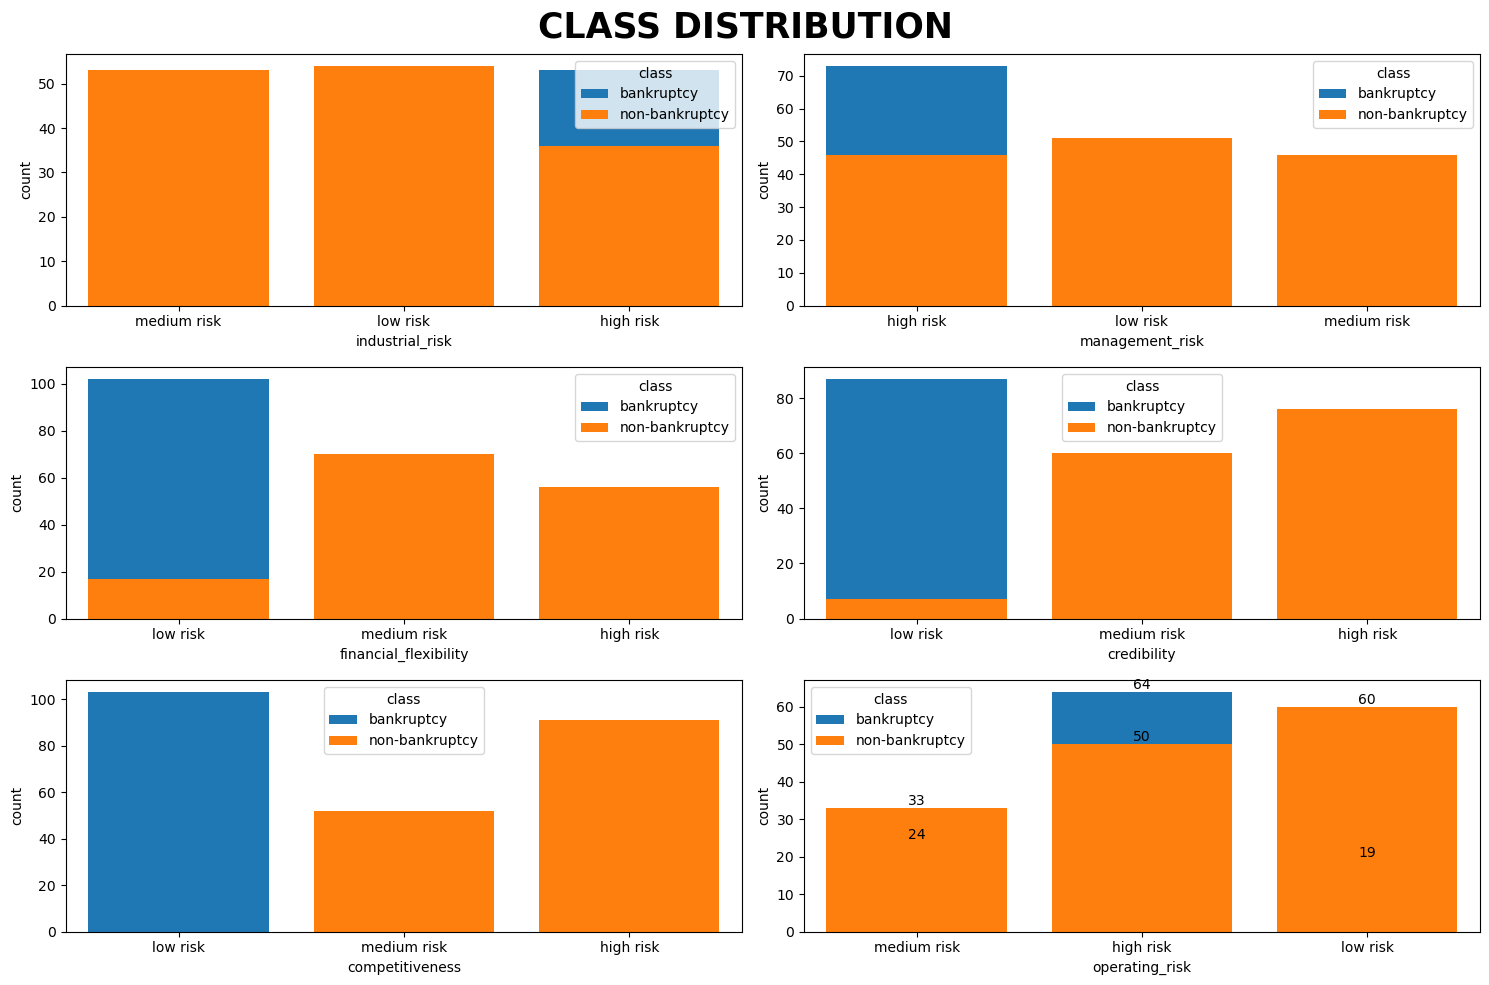

In [21]:
#Individual feature Analysis for class(create countplot) 
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(15,10))   
fig.suptitle('CLASS DISTRIBUTION',fontsize=25,fontweight='bold',color='black') 
risk_factors=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']
for i,risk_factors in enumerate(risk_factors):
    row=i//2 
    col=i%2 
    sns.countplot(x=risk_factors,data=data,hue='class',saturation=1.3,ax=ax[row,col],dodge=False)
for p in ax[row,col].patches:
    ax[row,col].text(p.get_x()+p.get_width()/2,p.get_height(),'%d'%int(p.get_height()),ha='center',va='bottom') 
plt.tight_layout()       

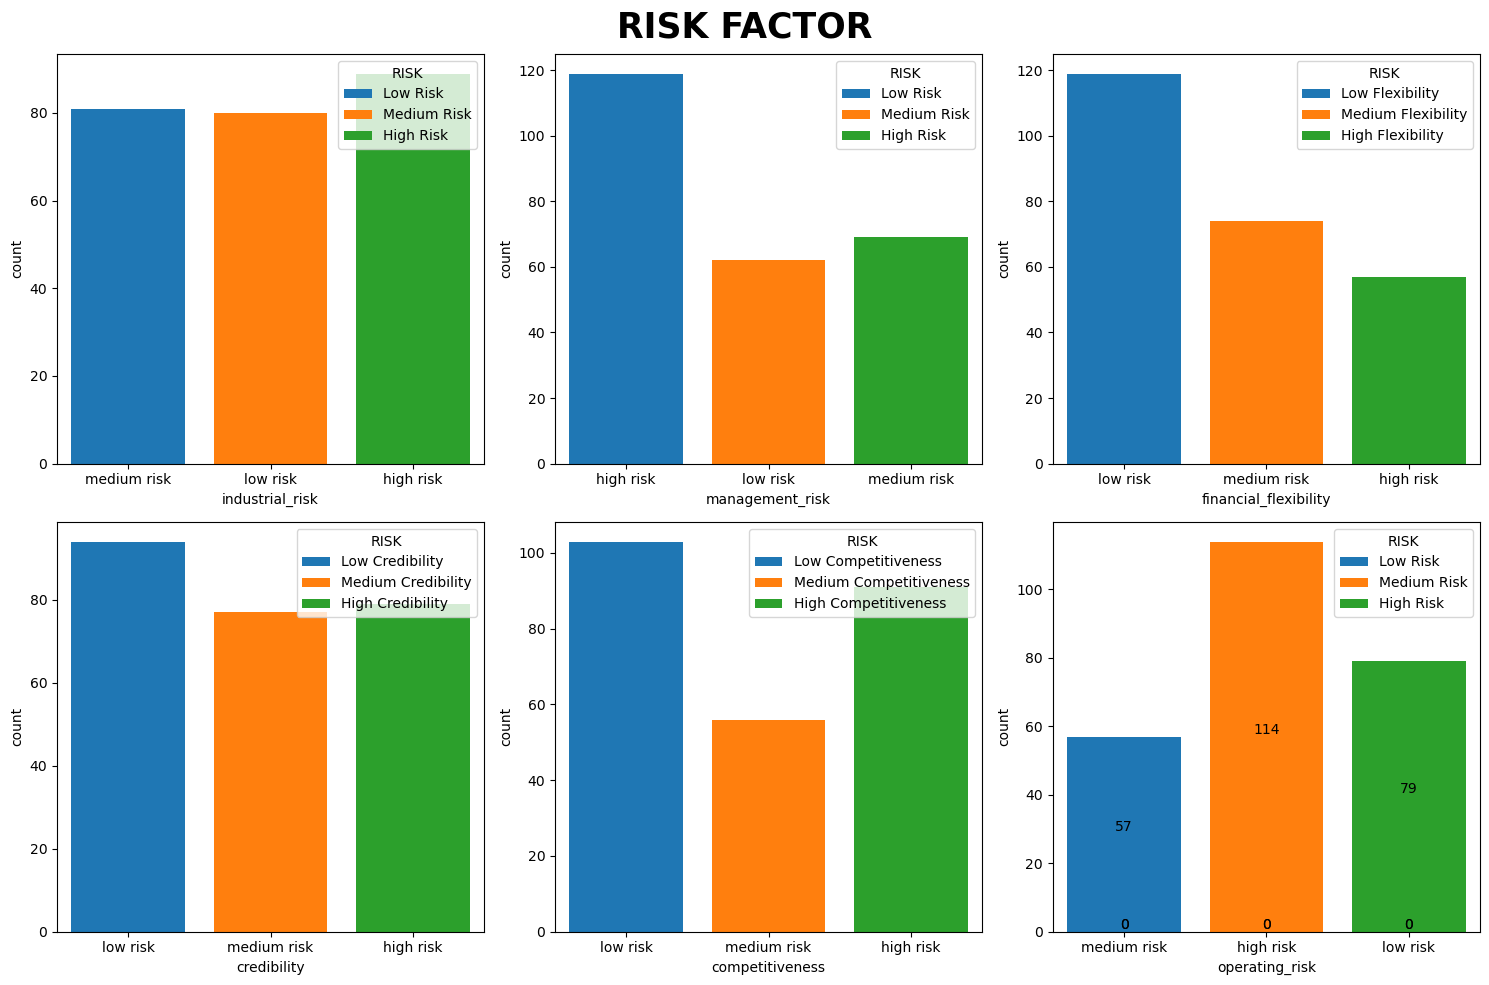

In [22]:
#Risk factor for each features 
fig,ax=plt.subplots(2,3,figsize=(15,10))  
fig.suptitle('RISK FACTOR',fontsize=25,fontweight='bold',color='black') 

features=['industrial_risk','management_risk','financial_flexibility','credibility','competitiveness','operating_risk']
risk_labels = [['Low Risk', 'Medium Risk', 'High Risk'],
               ['Low Risk', 'Medium Risk', 'High Risk'],
               ['Low Flexibility', 'Medium Flexibility', 'High Flexibility'],
               ['Low Credibility', 'Medium Credibility', 'High Credibility'],
               ['Low Competitiveness', 'Medium Competitiveness', 'High Competitiveness'],
               ['Low Risk', 'Medium Risk', 'High Risk']]
for i, features in enumerate(features):
    row=i//3
    col=i%3
    sns.countplot(x=features,data=data,hue=features,saturation=1.3,ax=ax[row,col],dodge=False)
    ax[row,col].legend(title='RISK',labels=risk_labels[i])
for p in ax[row,col].patches:
    if not p.get_height()== p.get_height():
        height=0 
    else:
        height=p.get_height()
        ax[row,col].text(p.get_x()+p.get_width()/2,height/2,int(height),ha='center',va='bottom') 
plt.tight_layout()  

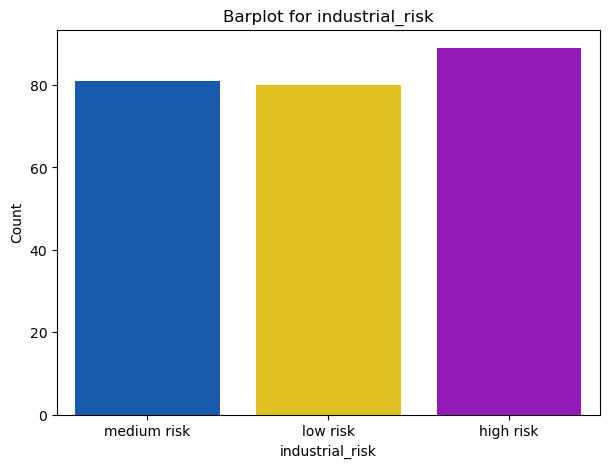

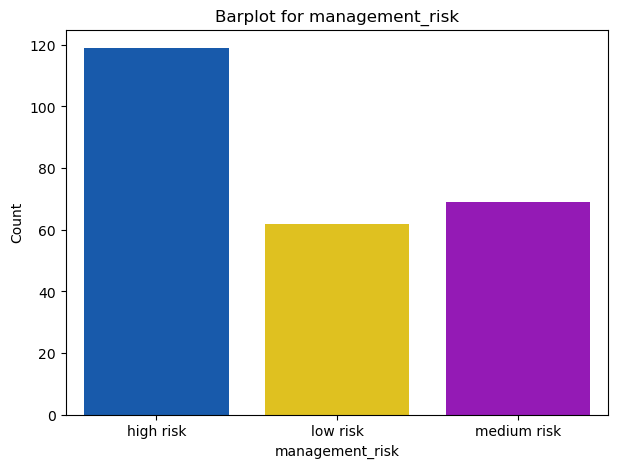

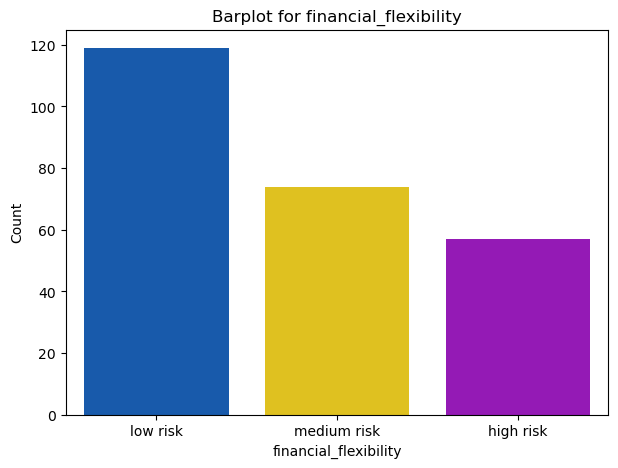

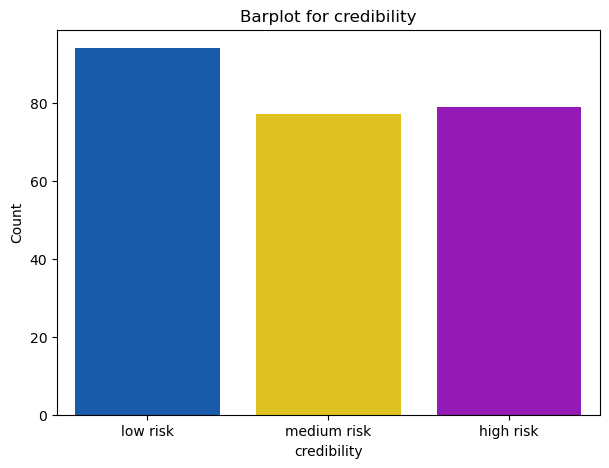

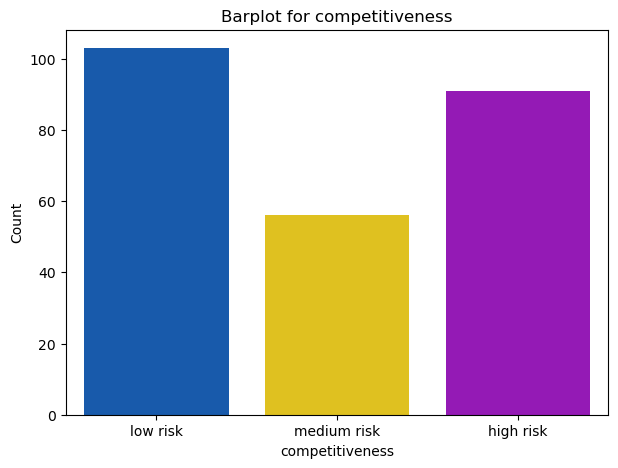

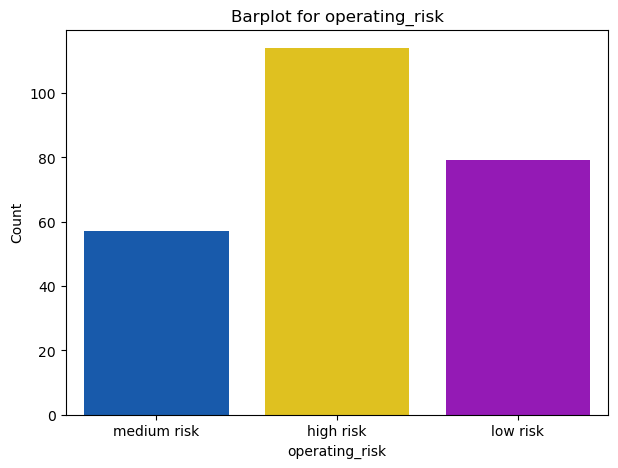

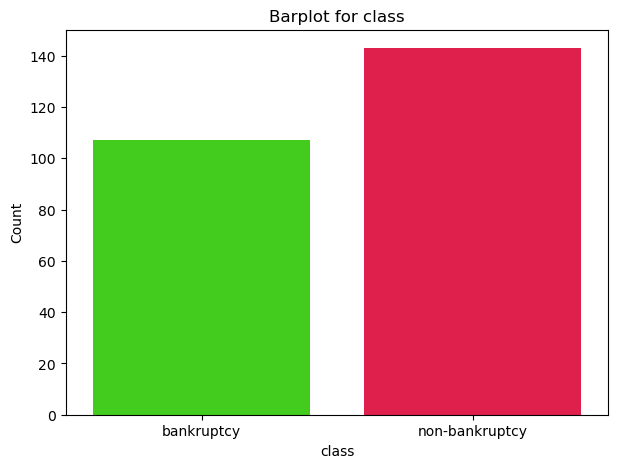

In [63]:
#countplot
for column in data.columns:
    plt.figure(figsize=(7, 5))  # Set individual figure size for each plot
    sns.countplot(x=column, data=data,palette='prism')
    plt.title(f'Barplot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()  # Display each plot individually

In [64]:
#inference
#After ploting countplot we can observe that industrial_risk , management_risk, and operating_risk having more highrisk
#and in remaining features count of highrisk is low.

In [65]:
#class features is our target features
#non-bankruptcy has more counts

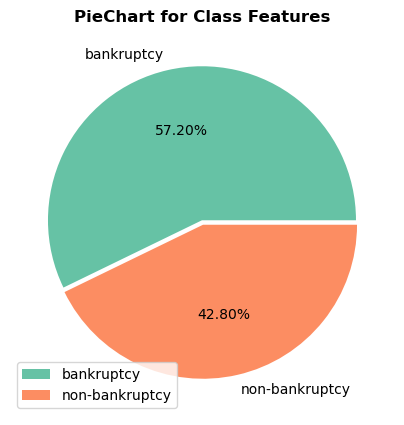

In [66]:
#pieplot
plt.figure(figsize=(5,5))
color=sns.color_palette('Set2')
plt.pie(data['class'].value_counts(),labels=data['class'].unique(),autopct='%.2f%%',colors=color,explode=[0.015,0.015])
plt.title('PieChart for Class Features',fontweight='bold')
plt.legend(loc='lower left')
plt.show()

In [67]:
#In this pieplot it showing bankruptcy and non-bankruptcy class features.Inference is, bankruptcy occurrences are more common(57.20%)
#than non-bankruptcy(42.80%).

# **BarPlot**

In [68]:
#BarPlot showing bankruptcy and non-bankruptcy cases across three levels  high risk, low risk, and medium risk .

Text(0, 0.5, 'counts')

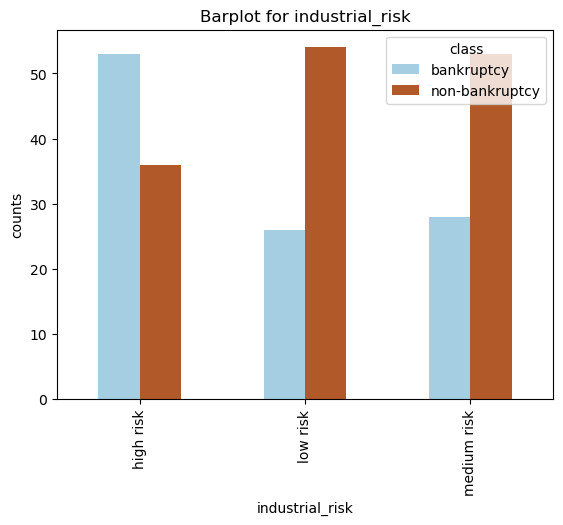

In [69]:
#crosstab for industrial_risk vs class
pd.crosstab(data['industrial_risk'],data['class']).plot(kind='bar',colormap='Paired')
plt.title('Barplot for industrial_risk')
plt.xlabel('industrial_risk')
plt.ylabel('counts')

In [70]:
#Barplot for relationship between industrial_risk and class feature
#high risk industries have more bankruptcy cases than non-bankruptcy.
#low risk industries have fewer bankruptcy cases compared to non-bankruptcy.
#medium risk industries have an equal amount of bankruptcy and non-bankruptcy cases as low risk.

Text(0.5, 1.0, 'Barplot for management_risk')

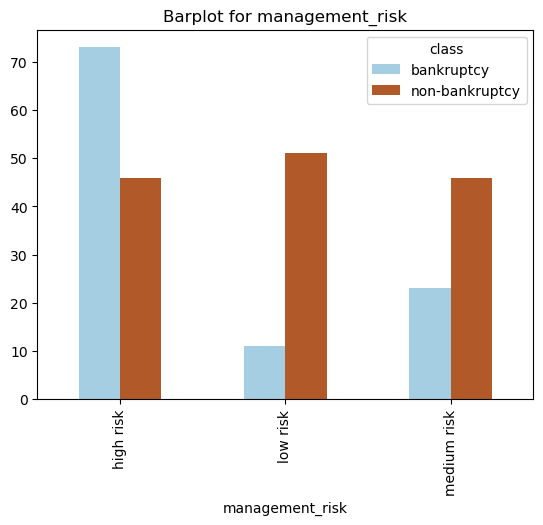

In [71]:
#cross for management_risk vs class
pd.crosstab(data['management_risk'],data['class']).plot(kind='bar',colormap='Paired')
plt.title('Barplot for management_risk')

In [72]:
#barplot showing management risk
#high risk have more bankruptcy cases than non-bankruptcy.
#low risk have fewer bankruptcy cases compared to non-bankruptcy.
#medium risk have an fewer amount of bankruptcy cases compared to non-bankruptcy cases.

Text(0.5, 1.0, 'Barplot for financial_flexibility')

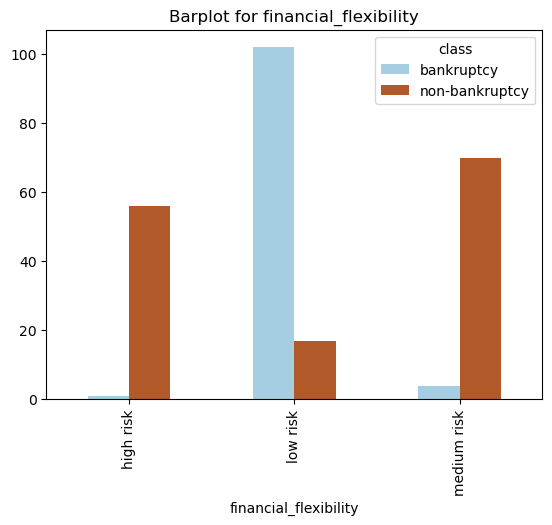

In [73]:
#crosstab for financial_flexibility vs class
pd.crosstab(data['financial_flexibility'],data['class']).plot(kind='bar',colormap='Paired')
plt.title('Barplot for financial_flexibility')

In [74]:
#barplot showing the relationship between financial flexibility and class features.
#Companies with low financial flexibility have a higher rate of bankruptcy,
#whereas those with high or medium financial flexibility are more often non-bankrupt.

Text(0.5, 1.0, 'Barplot for credibility')

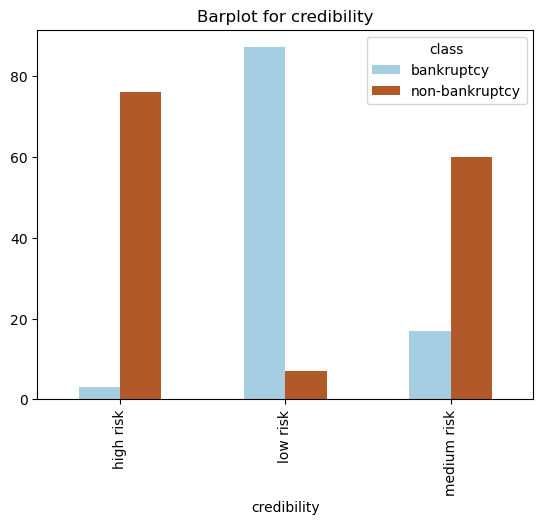

In [75]:
#crosstab for credibility vs class
pd.crosstab(data['credibility'],data['class']).plot(kind='bar',colormap='Paired')
plt.title('Barplot for credibility')

In [76]:
##barplot showing the relationship between credibility and class features.

Text(0.5, 1.0, 'Barplot for competitiveness')

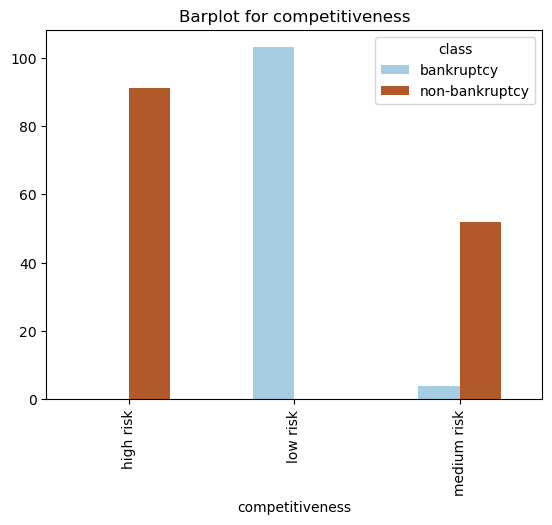

In [77]:
#crosstab for competitiveness vs class
pd.crosstab(data['competitiveness'],data['class']).plot(kind='bar',colormap='Paired')
plt.title('Barplot for competitiveness')

In [78]:
#barplot showing the relationship between competitiveness and class features.
#Companies with low risk have a higher rate of bankruptcy.
#Companies with high risk have a higher rate of non-bankruptcy
#Companies with medium risk have a higher rate of non-bankruptcy.

Text(0.5, 1.0, 'Barplot for operating_risk')

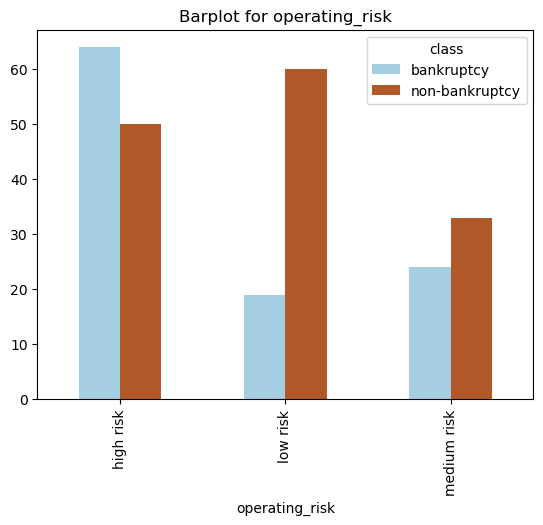

In [79]:
#crosstab for operating_risk vs class
pd.crosstab(data['operating_risk'],data['class']).plot(kind='bar',colormap='Paired')
plt.title('Barplot for operating_risk')

In [80]:
#barplot showing the relationship between operating_risk and class features.
#here for high risk, bankruptcy chances are more when compare with medium risk and low risk.

# **Features Engineering**

# **Encoding**

In [34]:
#here class features is in categorical data.So for model building we have to convert class into numeric data.
#So for that LabelEncoding is use.

In [35]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
data_copy['class']=le.fit_transform(data_copy['class'])
data_copy

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [37]:
#After encoding, here
#bankruptcy=0
#non-bankruptcy=1

In [50]:
df_outliers=data_copy.copy()

In [51]:
#handling outliers
from sklearn.ensemble import IsolationForest

In [52]:
isolationforest=IsolationForest(random_state=10,contamination=.01)
isolationforest.fit(df_outliers)
prediction_outliers=isolationforest.predict(df_outliers)
prediction_outliers

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [53]:
df_outliers['scores']=isolationforest.decision_function(df_outliers) #scores for each class
df_outliers['anomaly']=prediction_outliers  #-1 indicates outliers
df_outliers

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.145712,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.179722,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.089607,1
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.067834,1
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.215060,1
...,...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1,0.104623,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1,0.091653,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1,0.088232,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1,0.068579,1


**here -1 indicates outliers**

In [54]:
df_outliers[df_outliers['anomaly']==-1]

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,scores,anomaly
27,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.000517,-1
72,1.0,0.5,1.0,0.5,0.0,0.0,0,-0.044748,-1
192,0.5,1.0,0.0,0.0,1.0,0.0,1,-0.002184,-1


In [55]:
#Isolation forest is an unsupervised, non-parametric approach for multivariate data anomaly,
#which detects and focuses on continuous-valued data only.
#Here we have discrete data,so isolation forest is not so helpful here.

# **pps score**

In [56]:
#pps score
!pip install ppscore

  Using cached ppscore-1.3.0-py2.py3-none-any.whl


In [57]:
import ppscore as pps
pps.matrix(data)

ContextualVersionConflict: (pandas 2.0.3 (c:\users\dell\anaconda3\lib\site-packages), Requirement.parse('pandas<2.0.0,>=1.0.0'), {'ppscore'})

In [ ]:
#feature scaling
#As all the values in dataframe lies in the same range. So no need of Feature Scaling

# ***Separating into independent and dependent set***

In [ ]:
#independent set
x=data_copy.iloc[:,:-1]
#dependent set
y=data_copy['class']

# **Features Selection**

# **1.Uni-Variate Selection**

In [ ]:
#selecting an important and requried feature for model building

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
#feature selection
select=SelectKBest(score_func=chi2,k=5)
fit=select.fit(x,y)
fit

In [ ]:
print(fit.scores_)

In [ ]:
#dataframe describing Scores of each features
imp_features=pd.DataFrame(fit.scores_)
imp_features.index=data_copy.columns[0:-1]
imp_features.columns=['Scores']
imp_features

In [ ]:
#financial_flexibility
#credibility
#competitiveness

# **2.Recursive Feature Eliminator**

In [ ]:
#It is another method it is also use for selecting important features/

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
#1.RFE using logisticregression
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
rfe_lr=RFE(model_lr)
fit_lr=rfe_lr.fit(x,y)

In [ ]:
fit_lr.n_features_

In [ ]:
fit_lr.support_

In [ ]:
fit_lr.ranking_

In [ ]:
data_copy.columns

In [ ]:
#financial_flexibility
#credibility
#competitiveness
#These are the most important features by which we can get accurate result///

In [ ]:
#2.RFE using SupportVectorClassifer
from sklearn.svm import SVC
m_svc= SVC(kernel='linear')
rfe_svc = RFE(estimator=m_svc)
fit_svc = rfe_svc.fit(x, y)

In [ ]:
print(fit_svc.n_features_)
print(fit_svc.support_)
print(fit_svc.ranking_)

In [ ]:
print(data_copy.columns)

In [ ]:
#financial_flexibility
#credibility
#competitiveness
#from the above these 3 features are important features as there ranking is "1"

In [ ]:
#3.RFE using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
m_dt=DecisionTreeClassifier(criterion='gini')
rfe_dt=RFE(estimator=m_dt)
fit_dt=rfe_dt.fit(x,y)

In [ ]:
print(fit_dt.n_features_)
print(fit_dt.support_)
print(fit_dt.ranking_)

In [ ]:
print(data_copy.columns)

In [ ]:
#financial_flexibility
#credibility
#competitiveness
#from the above these 3 features are important features as there ranking is "1"

In [ ]:
#4.RFE using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
m_rfc=RandomForestClassifier(criterion='entropy')
rfe_rfc=RFE(estimator=m_rfc)
fit_rfc=rfe_rfc.fit(x,y)

In [ ]:
print(fit_rfc.n_features_)
print(fit_rfc.support_)
print(fit_rfc.ranking_)

In [ ]:
print(data_copy.columns)

In [ ]:
#financial_flexibility
#credibility
#competitiveness
#from the above these 3 features are important features as there ranking is "1"

In [ ]:
sns.barplot(imp_features['Scores'],orient='h',palette='hsv')
plt.ylabel('Features')
plt.xlabel('Scores')

**So here, from above different RFE MODELS techniques, we are going to consider the features with rank1 and rank2**

In [ ]:
#so features with rank1 and rank2 are
#financial_flexibility
#credibility
#competitiveness
#management_risk

In [59]:
#final dataframe with important features
final=data_copy[['management_risk','financial_flexibility','credibility','competitiveness','class']]
final

,management_risk,financial_flexibility,credibility,competitiveness,class
0,1.0,0.0,0.0,0.0,0
1,1.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.5,0.0,0
4,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...
245,1.0,1.0,1.0,1.0,1
246,1.0,0.5,1.0,1.0,1
247,1.0,1.0,0.5,0.5,1
248,0.0,0.5,1.0,0.5,1


In [60]:
#spliting into independent and dependent features
x=final.iloc[:,:-1]  #independent
y=final.iloc[:,-1]   #dependent

# **Model Validation**

**1.Train and Test Split**

In [61]:
#spliting into training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,f1_score

In [62]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10)

In [63]:
xtrain

,management_risk,financial_flexibility,credibility,competitiveness
121,1.0,0.5,1.0,0.5
7,1.0,0.0,0.0,0.0
249,0.0,0.5,0.5,1.0
39,1.0,0.0,1.0,0.0
205,0.0,0.5,1.0,1.0
...,...,...,...,...
64,1.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0
228,1.0,1.0,0.5,0.5
125,1.0,1.0,0.5,1.0


In [64]:
xtest

,management_risk,financial_flexibility,credibility,competitiveness
56,1.0,0.0,1.0,0.0
127,0.5,1.0,0.5,0.5
60,1.0,0.0,0.0,0.0
152,1.0,1.0,1.0,1.0
106,1.0,0.0,0.0,0.5
...,...,...,...,...
68,1.0,0.5,0.0,0.0
52,0.0,0.0,0.0,0.0
111,1.0,1.0,1.0,1.0
148,0.5,1.0,1.0,1.0


In [65]:
ytrain

121    1
7      0
249    1
39     0
205    1
      ..
64     0
15     0
228    1
125    1
9      0
Name: class, Length: 175, dtype: int32

In [66]:
ytest

56     0
127    1
60     0
152    1
106    0
      ..
68     0
52     0
111    1
148    1
32     0
Name: class, Length: 75, dtype: int32

In [67]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(175, 4)
(175,)
(75, 4)
(75,)


**2.KFold Cross Validation**

In [69]:
#kfold cross-validation
from sklearn.model_selection import KFold,cross_val_score
k=KFold(n_splits=10,shuffle=True,random_state=25)

# **Model Building Methods**

# **1.Logistic Regression**

In [70]:
#LogisticRegression using train-test-split
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(max_iter=400)                 #initialization
lr_model.fit(xtrain,ytrain)                               #fitting

LogisticRegression(max_iter=400)

In [71]:
#prediction
ypred=lr_model.predict(xtest)
ypred

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0])

In [72]:
#classification report
print('classification report:')
print(classification_report(ypred,ytest))

classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      1.00      0.99        40

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [73]:
#confusion matrix
confusion_matrix(ypred,ytest)

array([[34,  1],
       [ 0, 40]], dtype=int64)

In [74]:
#Accuracy score
score1=np.round(accuracy_score(ytest,ypred),4)*100
train1=np.round(lr_model.score(xtrain,ytrain),3)*100
print(f'Testing Accuracy Score:{score1}%')
print(f'Training Accuracy Score:{train1}%')

Testing Accuracy Score:98.67%
Training Accuracy Score:99.4%


In [75]:
#Accuracy Score for logistic regression when using train-test-split is, Training Accuracy Score: 0.9867 i.e 98.67%

In [76]:
#logistic regression using cross validation
lr_model=LogisticRegression(max_iter=400)
lr_result=cross_val_score(lr_model,x,y,cv=k)        #cross-validation-score
print(lr_result)

[1.   1.   1.   0.96 1.   0.96 1.   1.   1.   1.  ]


In [77]:
lr_accuracy=lr_result.mean()*100
print(f'Accuracy:{lr_accuracy}%')
print('Standard Deviation:',np.round(lr_result.std(),5))

Accuracy:99.2%
Standard Deviation: 0.016


In [78]:
#Accuracy Score of Logistic Regression when we perform using cross validation is, Accuracy=99.2%

# **2.DecisionTreeClassifier**

In [79]:
#decisionTreeclassifier using train-test-split
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)       #initialization
dt_model.fit(xtrain,ytrain)                                            #fitting

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [80]:
#prediction
ypred_dt=dt_model.predict(xtest)
ypred_dt

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0])

In [81]:
#classification report
print("classification report:")
print(classification_report(ytest,ypred_dt))

classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [82]:
#confusion matrix
confusion_matrix(ypred_dt,ytest)

array([[34,  1],
       [ 0, 40]], dtype=int64)

In [83]:
#Accuracy Score
score2=np.round(accuracy_score(ypred_dt,ytest),4)*100
train2=np.round(dt_model.score(xtrain,ytrain),3)*100
print(f'Testing Accuracy Score:{score2}%')
print(f'Training Accuracy Score:{train2}%')

Testing Accuracy Score:98.67%
Training Accuracy Score:100.0%


In [84]:
#Accuracy Score for DecisionTreeClassifier when using train-test-split is, Accuracy score: 0.9867 i.e 98.67%

In [85]:
#decisiontreeclassifier using cross validation
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
k=KFold(n_splits=10,shuffle=True,random_state=25)
dt_result=cross_val_score(dt_model,x,y,cv=k)
dt_result

array([1.  , 1.  , 1.  , 0.92, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [86]:
dt_accuracy=np.round(dt_result.mean(),4)*100
print(f'Accuracy:{dt_accuracy}%')
print('Standard Deviation:',np.round(dt_result.std(),4))

Accuracy:99.2%
Standard Deviation: 0.024


In [87]:
#Accuracy Score of DecisionTreeClassifier when we perform using cross validation is, Accuracy=98.6%

**TreePlot**

In [88]:
#treeplot
from sklearn import tree

dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

fn=x.columns
cn=['bankruptcy','non-bankruptcy']

plt.figure(figsize=(7,10))
tree.plot_tree(dt,feature_names=fn,class_names=cn,filled=True)
plt.show()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['management_risk', 'financial_flexibility', 'credibility',
       'competitiveness'],
      dtype='object') instead.

<Figure size 700x1000 with 0 Axes>

# **3.KNN Classification**

In [89]:
#knn classifier using train-test-split
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=15)          #initialization
knn_model.fit(xtrain,ytrain)                           #fitting

KNeighborsClassifier(n_neighbors=15)

In [90]:
#prediction
ypred_knn=knn_model.predict(xtest)
ypred_knn

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0])

In [91]:
#classification report
print('classification report:')
print(classification_report(ytest,ypred_knn))

classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [92]:
#confusion matrix
print(confusion_matrix(ytest,ypred_knn))

[[34  0]
 [ 1 40]]


In [93]:
#Accuracy Score
score3=np.round(accuracy_score(ytest,ypred_knn),4)*100
train3=np.round(knn_model.score(xtrain,ytrain),3)*100
print(f'Testing Accuracy Score:{score3}%')
print(f'Training Accuracy Score:{train3}%')

Testing Accuracy Score:98.67%
Training Accuracy Score:99.4%


In [94]:
#Accuracy Score for KNN Classifier when using train-test-split is, Accuracy score: 0.9867 i.e 98.67%

In [95]:
#KNN classifier using cross-validation
knn_model=KNeighborsClassifier(n_neighbors=11)
k=KFold(n_splits=10,shuffle=True,random_state=15)
knn_result=cross_val_score(knn_model,x,y,cv=k)
knn_result

array([1.  , 1.  , 1.  , 0.92, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [96]:
knn_accuracy=np.round(knn_result.mean(),4)*100
print(f'Accuracy:{knn_accuracy}%')
print('Standard Devivation:',np.round(knn_result.std(),5))

Accuracy:99.2%
Standard Devivation: 0.024


In [97]:
#Accuracy Score of KNN classifier when we perform using cross validation is, Accuracy=99.2%

# **4.SVM Classification**

In [98]:
#svm classification for train-test-split
from sklearn.svm import SVC
svm_model=SVC(kernel='linear',C=15,gamma=30)        #initialization
svm_model.fit(xtrain,ytrain)                        #fitting

SVC(C=15, gamma=30, kernel='linear')

In [99]:
#predicting model
ypred_svm=svm_model.predict(xtest)
ypred_svm

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0])

In [100]:
#classification report
print('classification report:')
print(classification_report(ytest,ypred_svm))

classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [101]:
#confusion matrix
confusion_matrix(ytest,ypred_svm)

array([[34,  0],
       [ 1, 40]], dtype=int64)

In [102]:
#Accuracy Score
score4=np.round(accuracy_score(ytest,ypred_svm),4)*100
train4=svm_model.score(xtrain,ytrain)*100
print(f'Testing Accuracy Score:{score4}%')
print(f'Training Accuracy Score:{train4}%')

Testing Accuracy Score:98.67%
Training Accuracy Score:100.0%


In [103]:
#Accuracy Score for SVM Classifier when using train-test-split is, Accuracy score:0.9867 i.e 98.67%

In [104]:
#svm classification using cross validation
svm_model=SVC(kernel='linear',C=10,gamma=25)
svm_result=cross_val_score(svm_model,x,y,cv=k)
svm_result

array([1.  , 1.  , 1.  , 0.96, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [105]:
svm_accuracy=np.round(svm_result.mean(),4)*100
print(f'Accuracy:{svm_accuracy}%')
print('Standard Deviation:',np.round(svm_result.std(),4))

Accuracy:99.6%
Standard Deviation: 0.012


In [106]:
#Accuracy Score of SVM classifier when we perform using cross validation is, Accuracy=99.6%

# **5.Naive Bayes**

In [107]:
y.value_counts()
#As the data is imbalanced , bankruptcy and non-bankruptcy datacase are not roughly similar.
#So at this situation Complement Naive Bayes is best used///

class
1    143
0    107
Name: count, dtype: int64

In [108]:
#naive bayes using train-test-split
from sklearn.naive_bayes import ComplementNB
nb_model=ComplementNB()                           #initialization
nb_model.fit(xtrain,ytrain)                       #fitting

ComplementNB()

In [109]:
#prediction
ypred_nb=nb_model.predict(xtest)
ypred_nb

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0])

In [110]:
#classification report
print('classification report:')
print(classification_report(ytest,ypred_nb))

classification report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [111]:
#confusion matrix
confusion_matrix(ytest,ypred_nb)

array([[33,  1],
       [ 0, 41]], dtype=int64)

In [112]:
#Accuracy Score
score5=np.round(accuracy_score(ytest,ypred_nb),3)*100
train5=np.round(nb_model.score(xtrain,ytrain),4)*100
print(f'Testing Accuracy Score:{score5}%')
print(f'Training Accuracy Score:{train5}%')

Testing Accuracy Score:98.7%
Training Accuracy Score:97.71%


In [113]:
#Accuracy Score for Naive Bayes Classifier when using train-test-split is, Accuracy score:0.987 i.e 98.7%

In [114]:
#naivebayes classification using cross-validation
nb_model=ComplementNB()
nb_result=cross_val_score(nb_model,x,y,cv=k)
nb_result

array([1.  , 0.96, 1.  , 0.96, 0.96, 0.96, 1.  , 1.  , 0.96, 1.  ])

In [115]:
naive_accuracy=np.round(nb_result.mean(),4)*100
print(f'Accuracy:{naive_accuracy}%')
print('Standard Deviation:',np.round(nb_result.std(),4))

Accuracy:98.0%
Standard Deviation: 0.02


In [116]:
#Accuracy Score of Naive Bayes Classifier when we perform using cross validation is, Accuracy=98.0%

# **6.Random Forest**

In [117]:
#RandomForest with train-test-split
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier(n_estimators=70,criterion='gini',max_features=3,max_depth=3,random_state=35) #initialization
rfc_model.fit(xtrain,ytrain)  #fitting

RandomForestClassifier(max_depth=3, max_features=3, n_estimators=70,
                       random_state=35)

In [118]:
#prediction
ypred_rfc=rfc_model.predict(xtest)
ypred_rfc

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0])

In [119]:
#classification report
print('Classification Report:')
print(classification_report(ytest,ypred_rfc))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        41

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [120]:
#confusion matrix
confusion_matrix(ytest,ypred_rfc)

array([[34,  0],
       [ 1, 40]], dtype=int64)

In [121]:
#Accuracy Score
score6=np.round(accuracy_score(ytest,ypred_rfc),5)*100
train6=rfc_model.score(xtrain,ytrain)*100
print(f'Testing Accuracy Score:{score6}%')
print(f'Training Accuracy Score:{train6}%')

Testing Accuracy Score:98.667%
Training Accuracy Score:100.0%


In [122]:
#Accuracy Score for RandomForestClassifier when using train-test-split is, Accuracy score:0.9867 i.e 98.667%

In [123]:
#randomforestclassifier using cross-validation
rfc_model=RandomForestClassifier(n_estimators=70,criterion='gini',max_features=3,max_depth=3,random_state=35)
rfc_result=cross_val_score(rfc_model,x,y,cv=k)
rfc_result

array([1.  , 0.96, 1.  , 0.96, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [124]:
rfc_accuracy=rfc_result.mean()*100
print(f"Accuracy:{rfc_accuracy}%")
print('Standard Deviation:',np.round(rfc_result.std(),4))

Accuracy:99.2%
Standard Deviation: 0.016


In [125]:
#Accuracy Score of RandomForestClassifier when we perform using cross validation is, Accuracy=99.20%

**dataframe showing all models with train-test-model scores and cross-validation model scores**

In [126]:
val={'Models':pd.Series(['Logistic Regression','Decision Tree','KNN','SVC','Naive Bayes','Random Forest']),
     'Scores(Testing Accuracy)':pd.Series([score1,score2,score3,score4,score5,score6]),
     'Scores(Training Accuracy)':pd.Series([train1,train2,train3,train4,train5,train6]),
     'Scores(cross_val)':pd.Series([lr_accuracy,dt_accuracy,knn_accuracy,svm_accuracy,naive_accuracy,rfc_accuracy])}

scores=pd.DataFrame(val)
scores

,Models,Scores(Testing Accuracy),Scores(Training Accuracy),Scores(cross_val)
0,Logistic Regression,98.670,99.40,99.2
1,Decision Tree,98.670,100.00,99.2
2,KNN,98.670,99.40,99.2
3,SVC,98.670,100.00,99.6
4,Naive Bayes,98.700,97.71,98.0
5,Random Forest,98.667,100.00,99.2


In [127]:
data_copy.shape

(250, 7)

In [128]:
#As our dataset is small ,cleaned and well defined after feature engineering, so we have got higher accuracy scores.

# **Final Model**

In [129]:
#As all the model are get approximately same accuracy score after train-test-split and cross-validation.
#So let us consider random forest for our final model building

In [130]:
#random forest
rfc_model=RandomForestClassifier(n_estimators=70,criterion='gini',max_features=3,max_depth=3,random_state=35)
k=KFold(n_splits=10,shuffle=True,random_state=25)
rfc_result=cross_val_score(rfc_model,x,y,cv=k)
rfc_model.fit(xtrain,ytrain)
test=np.round(rfc_model.score(xtest,ytest),4)*100
train=np.round(rfc_model.score(xtrain,ytrain),4)*100

In [131]:
print(f"Final Accuracy:{rfc_accuracy}%")
print(f'Testing Accuracy:{test}%')
print(f'Training Accuracy:{train}%')
print('Standard Deviation:',np.round(rfc_result.std(),4))

Final Accuracy:99.2%
Testing Accuracy:98.67%
Training Accuracy:100.0%
Standard Deviation: 0.024


# **Testing Final Model**

In [132]:
#bankruptcy=0
#non-bankruptcy=1

In [133]:
final_df=data_copy.drop(['industrial_risk','operating_risk'],axis=1)
final_df['class']=final['class'].map({0:'bankruptcy',1:'non-bankruptcy'})
final_df

,management_risk,financial_flexibility,credibility,competitiveness,class
0,1.0,0.0,0.0,0.0,bankruptcy
1,1.0,0.0,0.0,0.0,bankruptcy
2,0.0,0.0,0.0,0.0,bankruptcy
3,0.0,0.0,0.5,0.0,bankruptcy
4,1.0,0.0,0.0,0.0,bankruptcy
...,...,...,...,...,...
245,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,0.5,1.0,1.0,non-bankruptcy
247,1.0,1.0,0.5,0.5,non-bankruptcy
248,0.0,0.5,1.0,0.5,non-bankruptcy


In [134]:
X=final_df.iloc[:,:-1]
Y=final_df.iloc[:,-1]
rfc_model=RandomForestClassifier(n_estimators=70,criterion='gini',max_features=3,max_depth=3,random_state=35)
rfc_model.fit(X,Y)

RandomForestClassifier(max_depth=3, max_features=3, n_estimators=70,
                       random_state=35)

In [135]:
#example data for prediction
dataframe=pd.DataFrame({'management_risk':[0,1,0.5],
                        'financial_flexibility':[0.5,0,0],
                        'credibility':[0,1,1],
                        'competitiveness':[1,0,0.5]})
dataframe

,management_risk,financial_flexibility,credibility,competitiveness
0,0.0,0.5,0,1.0
1,1.0,0.0,1,0.0
2,0.5,0.0,1,0.5


In [136]:
#predicting the example dataframe
pred_df=rfc_model.predict(dataframe)
print(pred_df)

['non-bankruptcy' 'bankruptcy' 'non-bankruptcy']


# **Streamlit App**

In [148]:
pip install streamlit

In [143]:
%%writefile app.py

import pandas as pd
import streamlit as st
from sklearn.ensemble import RandomForestClassifier

st.title('BANKRUPTCY PREDICTION APPLICATION')
st.sidebar.header('User Input Risk')

def user_input_features():
  ManagementRisk=st.sidebar.selectbox('Management Risk',('0','0.5','1'))
  Financial_Flexibility=st.sidebar.selectbox('Financial_Flexibility Risk',('0','0.5','1'))
  Credibility=st.sidebar.selectbox('Credibility Risk',('0','0.5','1'))
  Competitiveness=st.sidebar.selectbox('Competitiveness Risk',('0','0.5','1'))

  data={'management_risk':ManagementRisk,
        'financial_flexibility':Financial_Flexibility,
        'credibility':Credibility,
        'competitiveness':Competitiveness}

  features=pd.DataFrame(data,index=[0])
  return features

df=user_input_features()
st.subheader('User Input Parameter')
st.write(df)

bank=pd.read_excel('bankruptcy-prevention.xlsx')
#spliting values into each columns
bank = bank['industrial_risk; management_risk; financial_flexibility; credibility; competitiveness; operating_risk; class'].str.split(';', expand=True)
bank.columns = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']
bank_copy=bank.copy()
convert=bank_copy.columns[:-1]
bank[convert]=bank[convert].apply(pd.to_numeric, errors='coerce')

bank.drop(['industrial_risk','operating_risk'],axis=1,inplace=True)

x=bank.iloc[:,:-1]
y=bank['class']
model=RandomForestClassifier(n_estimators=70,criterion='gini',max_features=3,max_depth=3,random_state=35)
model.fit(x,y)
prediction=model.predict(df)
prediction_proba=model.predict_proba(df)

st.subheader('Prediction Result')
if st.sidebar.button('Prediction'):
  if(prediction=='bankruptcy'):
    st.warning('bankruptcy')
  else:
    st.success('non-bankruptcy')

st.subheader('Prediction Probability')
proba=pd.DataFrame(prediction_proba,columns=['bankruptcy','non-bankruptcy'])
st.write(proba)

Overwriting app.py


In [ ]:
!pip3 install py-localtunnel

In [ ]:
!streamlit run app.py &>/content/logs.txt&

In [ ]:
!npx localtunnel --port 8501 & curl ipv4.icanhazip.com